In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin[[ 'timestamp', 'RRU.PrbUsedDl','RRU.PrbUsedUl']].copy()
df_1['Date']=pd.to_datetime(df_1['timestamp'], dayfirst=True, unit='s',origin='unix')
df_1.drop(columns='timestamp', inplace=True)
df_1.set_index('Date', inplace=True)
df_1

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 16:00:00,81.459016,81.459016
2022-12-31 16:00:00,50.000000,50.000000
2022-12-31 16:00:00,64.300000,64.300000
2022-12-31 16:00:00,80.900000,80.900000
2022-12-31 16:00:00,0.000000,0.000000
...,...,...
2023-01-07 15:59:00,0.000000,0.000000
2023-01-07 15:59:00,0.000000,0.000000
2023-01-07 15:59:00,0.000000,0.000000


In [4]:
df_2= df_1.resample('min').mean()[:110]

df_2

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 16:00:00,41.647609,40.984468
2022-12-31 16:01:00,42.121474,41.068910
2022-12-31 16:02:00,41.851282,40.958333
2022-12-31 16:03:00,42.577885,41.491026
2022-12-31 16:04:00,43.626603,42.665705
...,...,...
2022-12-31 17:45:00,39.229487,38.441987
2022-12-31 17:46:00,38.160256,35.360256
2022-12-31 17:47:00,42.490064,41.615064


In [5]:
df_2.index = pd.to_datetime(df_2.index)
df_2['RRU.PrbUsedDl']=np.array(range(1, 111))
df_2['RRU.PrbUsedUl']=2*np.array(range(1, 111))
df_2

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 16:00:00,1,2
2022-12-31 16:01:00,2,4
2022-12-31 16:02:00,3,6
2022-12-31 16:03:00,4,8
2022-12-31 16:04:00,5,10
...,...,...
2022-12-31 17:45:00,106,212
2022-12-31 17:46:00,107,214
2022-12-31 17:47:00,108,216


In [6]:
df_final=df_2.astype('float32').copy()

y_train= df_final.iloc[10:100]
#x_train=df_final.loc['2022-12-31':'2023-01-06'].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'])
x_train=df_final.iloc[:90]

y_validation=df_final.iloc[100:]
# x_validation = df_final.loc['2023-01-07':].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl']).iloc[:-2]
x_validation = df_final.iloc[90:100]
print("shape y_train:", y_train.shape, "shape x_train:", x_train.shape, "shape y_validation:", y_validation.shape, "shape x_validation:", x_validation.shape)

shape y_train: (90, 2) shape x_train: (90, 2) shape y_validation: (10, 2) shape x_validation: (10, 2)


In [7]:
x_validation

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 17:30:00,91.0,182.0
2022-12-31 17:31:00,92.0,184.0
2022-12-31 17:32:00,93.0,186.0
2022-12-31 17:33:00,94.0,188.0
2022-12-31 17:34:00,95.0,190.0
2022-12-31 17:35:00,96.0,192.0
2022-12-31 17:36:00,97.0,194.0
2022-12-31 17:37:00,98.0,196.0
2022-12-31 17:38:00,99.0,198.0


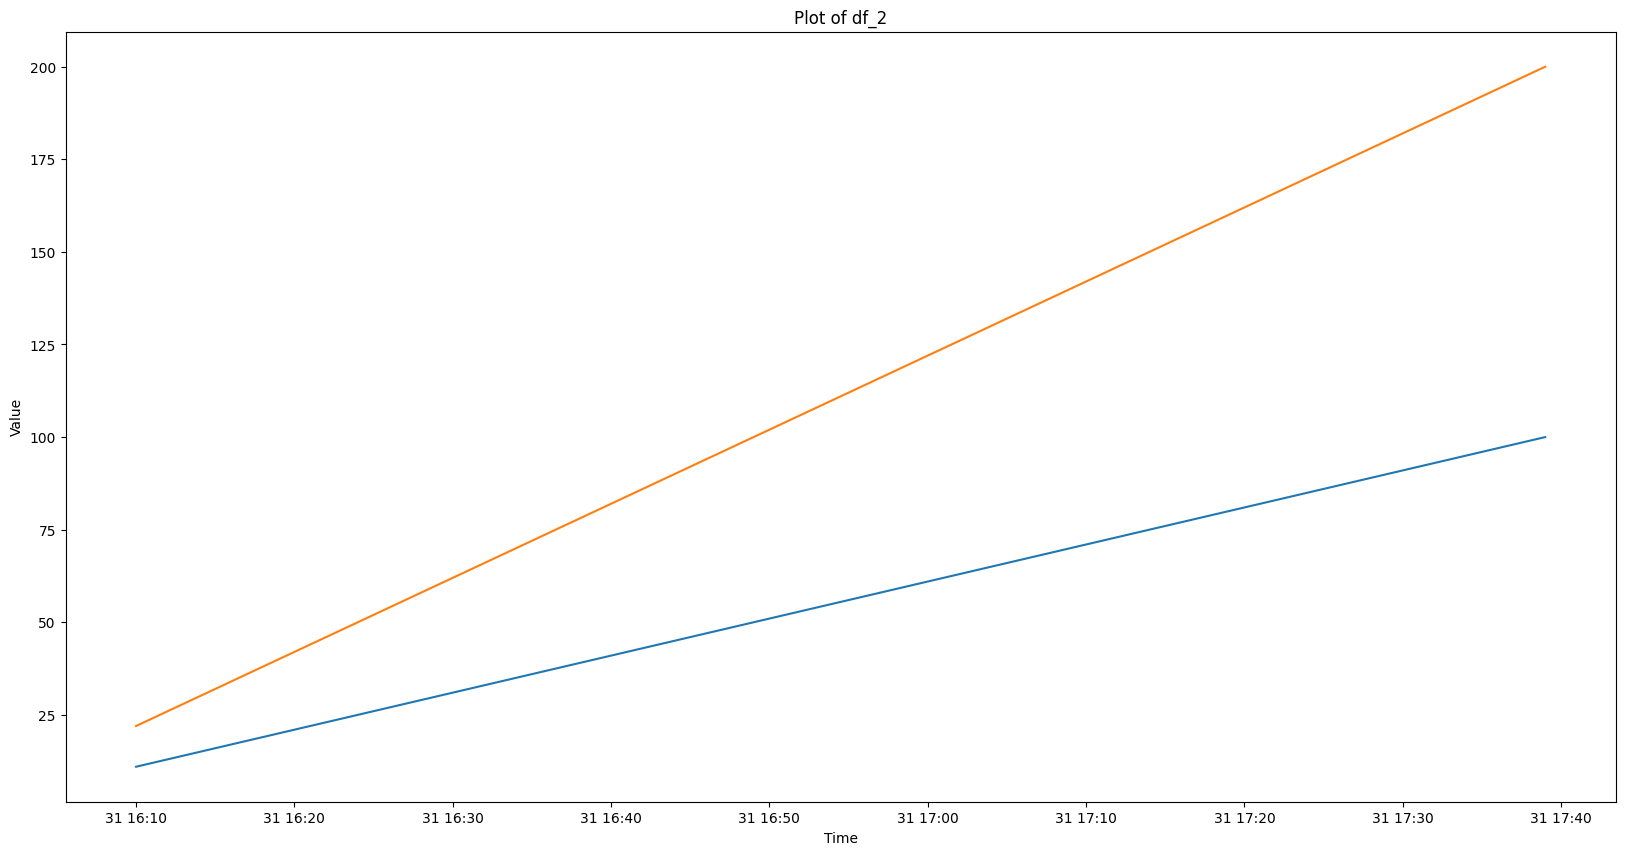

In [8]:
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame
plt.figure(figsize=(20, 10))  # Set the figure size
plt.plot(y_train[:]) # Plot the DataFrame; it automatically uses the datetime index for the x-axis
plt.title('Plot of df_2')  # Set the title of the plot
plt.xlabel('Time')  # Set the label for the x-axis
plt.ylabel('Value')  # Set the label for the y-axis
plt.show()  # Display the plot

In [9]:
from sklearn.preprocessing import  StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
def scaler_data(data): 
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler


def split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep+1)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

def y_split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep+1)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

def tensorflow_lstm(X_train_scaled, Y_train_scaled, X_validation_scaled, Y_validation_scaled, 
                    learning_rate, target_MAE,  jumlah_epochs, jumlah_sampel_batch,
                    jumlah_epoch_terbelakang,  save_best_model_path, validation_data=False,load_model=None):
    global model
    class MAEStopCallback(tf.keras.callbacks.Callback):
        def __init__(self, threshold):
            super(MAEStopCallback, self).__init__()
            self.threshold = threshold

        def on_epoch_end(self, epoch, logs=None):
            if logs['mae'] < self.threshold:
                print(f"\nMAE reached below {self.threshold}. Stopping training.")
                self.model.stop_training = True


    time_step=X_train_scaled.shape[1]
    jumlah_fitur=X_train_scaled.shape[2]
    n_output_features= Y_train_scaled.shape[2]
    model = tf.keras.models.Sequential()
    if load_model==None:
        model.add(tf.keras.layers.LSTM(activation='relu', units=50, input_shape=(time_step, jumlah_fitur), return_sequences=True))
        model.add(tf.keras.layers.TimeDistributed(
            tf.keras.layers.Dense(n_output_features)
            ))
    else:
        model = tf.keras.models.load_model(load_model)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
    mae_stop_callback = MAEStopCallback(threshold=target_MAE) 
    
    # ReduceLROnPlateau callback
    reduce_lr = ReduceLROnPlateau(monitor='mae', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

    # Add ModelCheckpoint
    checkpoint_callback = ModelCheckpoint(
        save_best_model_path,
        monitor='mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        save_best_only=True, # Only save the best model
        verbose=1            # Show messages about the model saving
    )
    # Add EarlyStopping 
    early_stopping_callback = EarlyStopping(
        monitor='mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        patience=jumlah_epoch_terbelakang,    # Number of consecutive epochs with no improvement after which training will be stopped
        restore_best_weights=True,
        verbose=1            # Show messages about early stopping
    )
    #lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
    if validation_data==True:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs,  verbose=1,  
                 # callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback, reduce_lr ], 
                  validation_data=(X_validation_scaled, Y_validation_scaled), validation_batch_size=jumlah_sampel_batch)
    else:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, verbose=1
                   #callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback, reduce_lr ]
                   )

    
    loss,MSE, MAE=model.evaluate(X_train_scaled, Y_train_scaled)
    print("loss: ",loss, "MSE: ", MSE, "MAE: ", MAE)
    
    return model,   loss,   MSE, MAE

In [10]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)
timestep=10

In [11]:
# x_train_scaled_final= split_input_to_timestep(x_train_scaled.to_numpy(), timestep=timestep)
# y_train_scaled_final=y_split_input_to_timestep(y_train_scaled, timestep=timestep)
# print("shape y_train after %d timestep:"%timestep, y_train_scaled_final.shape)
# print("shape x_train after split into %d timestep:"%timestep, x_train_scaled_final.shape)

# x_validation_scaled_final = split_input_to_timestep(x_validation_scaled.to_numpy(), timestep=timestep)
# y_validation_scaled_final = y_split_input_to_timestep(y_validation_scaled, timestep=timestep)
# print("shape y_validation after %d timestep:" % timestep, y_validation_scaled_final.shape)
# print("shape x_validation after split into %d timestep:" % timestep, x_validation_scaled_final.shape)

In [12]:
x_train_scaled_final= split_input_to_timestep(x_train.to_numpy(), timestep=timestep)
y_train_scaled_final=y_split_input_to_timestep(y_train.to_numpy(), timestep=timestep)
print("shape y_train after %d timestep:"%timestep, y_train_scaled_final.shape)
print("shape x_train after split into %d timestep:"%timestep, x_train_scaled_final.shape)

x_validation_scaled_final = split_input_to_timestep(x_validation.to_numpy(), timestep=timestep)
y_validation_scaled_final = y_split_input_to_timestep(y_validation.to_numpy(), timestep=timestep)
print("shape y_validation after %d timestep:" % timestep, y_validation_scaled_final.shape)
print("shape x_validation after split into %d timestep:" % timestep, x_validation_scaled_final.shape)

shape y_train after 10 timestep: (81, 10, 2)
shape x_train after split into 10 timestep: (81, 10, 2)
shape y_validation after 10 timestep: (1, 10, 2)
shape x_validation after split into 10 timestep: (1, 10, 2)


In [13]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

'20240717_1511'

In [14]:
n_output_features= y_train_scaled_final.shape[2]
model_lstm, loss, MSE, MAE      = tensorflow_lstm(x_train_scaled_final, y_train_scaled_final, x_validation_scaled_final, y_validation_scaled_final,
                                                  learning_rate=0.001, target_MAE=0.1,  jumlah_epochs=1000, jumlah_sampel_batch=60, 
                                                  jumlah_epoch_terbelakang=3,  save_best_model_path = 'MAE_lowest_%s.hdf5'%timestamp, 
                                                  validation_data=True, load_model=None)
nama_file='enam_%s.hdf5'%timestamp
model_lstm.save(filepath=nama_file)

Epoch 1/1000
3/3 [==============================] - 2s 117ms/step - loss: 8666.8486 - mse: 8666.8496 - mae: 79.1482 - val_loss: 25043.5430 - val_mse: 25043.5430 - val_mae: 145.5352
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 8206.2705 - mse: 8206.2715 - mae: 77.3322 - val_loss: 24128.4688 - val_mse: 24128.4688 - val_mae: 143.0644
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 7892.4146 - mse: 7892.4141 - mae: 75.8260 - val_loss: 23293.3750 - val_mse: 23293.3750 - val_mae: 140.3073
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 7592.6094 - mse: 7592.6094 - mae: 74.1785 - val_loss: 22449.5742 - val_mse: 22449.5742 - val_mae: 137.2454
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 7201.8896 - mse: 7201.8901 - mae: 71.9135 - val_loss: 20676.1992 - val_mse: 20676.1992 - val_mae: 130.1295
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 6605.9092 - mse: 6605.9097

In [15]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10600     
                                                                 
 time_distributed (TimeDistr  (None, 10, 2)            102       
 ibuted)                                                         
                                                                 
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________


In [45]:
apapun=x_validation[-timestep:].to_numpy().reshape((1, timestep, n_output_features))
apapun= apapun.astype(int)

In [47]:
apapun

array([[[ 91, 182],
        [ 92, 184],
        [ 93, 186],
        [ 94, 188],
        [ 95, 190],
        [ 96, 192],
        [ 97, 194],
        [ 98, 196],
        [ 99, 198],
        [100, 200]]])

In [48]:
hasil= model.predict(apapun)
hasil =hasil.reshape((timestep,n_output_features))
hasil.shape

1/1 [==============================] - 0s 113ms/step


(10, 2)

In [49]:
hasil

array([[103.601555, 205.46983 ],
       [102.08634 , 204.46175 ],
       [103.35936 , 206.14987 ],
       [104.71555 , 208.32025 ],
       [105.30915 , 210.98413 ],
       [107.11472 , 212.30035 ],
       [107.37437 , 215.11954 ],
       [108.7179  , 216.59084 ],
       [109.46642 , 219.15904 ],
       [110.28669 , 220.81853 ]], dtype=float32)

In [50]:
predictions =   hasil
predictions = predictions.reshape(-1,n_output_features)
actual      =   y_validation[-timestep:]
print("predictions.shape:", predictions.shape, "actual.shape:", actual.shape)

predictions.shape: (10, 2) actual.shape: (10, 2)


In [51]:
x_validation

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 17:30:00,91.0,182.0
2022-12-31 17:31:00,92.0,184.0
2022-12-31 17:32:00,93.0,186.0
2022-12-31 17:33:00,94.0,188.0
2022-12-31 17:34:00,95.0,190.0
2022-12-31 17:35:00,96.0,192.0
2022-12-31 17:36:00,97.0,194.0
2022-12-31 17:37:00,98.0,196.0
2022-12-31 17:38:00,99.0,198.0


In [52]:
predictions

array([[103.601555, 205.46983 ],
       [102.08634 , 204.46175 ],
       [103.35936 , 206.14987 ],
       [104.71555 , 208.32025 ],
       [105.30915 , 210.98413 ],
       [107.11472 , 212.30035 ],
       [107.37437 , 215.11954 ],
       [108.7179  , 216.59084 ],
       [109.46642 , 219.15904 ],
       [110.28669 , 220.81853 ]], dtype=float32)

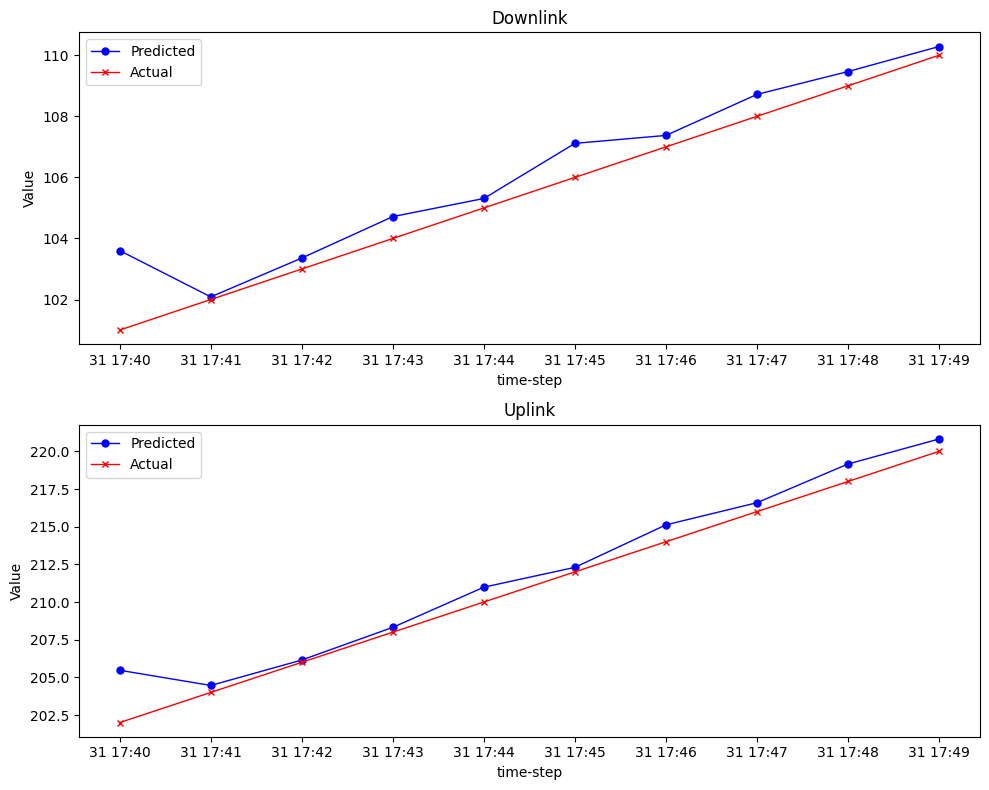

In [53]:
import matplotlib.pyplot as plt

# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
time_x= pd.to_datetime(x_validation.index)+ pd.to_timedelta(10, unit='m')
actual= actual.to_numpy()
for i in range(n_output_features):
    axs[i].plot(time_x, predictions[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(time_x, actual[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [54]:
time_x

DatetimeIndex(['2022-12-31 17:40:00', '2022-12-31 17:41:00',
               '2022-12-31 17:42:00', '2022-12-31 17:43:00',
               '2022-12-31 17:44:00', '2022-12-31 17:45:00',
               '2022-12-31 17:46:00', '2022-12-31 17:47:00',
               '2022-12-31 17:48:00', '2022-12-31 17:49:00'],
              dtype='datetime64[ns]', name='Date', freq='T')